In [35]:
import forward_model as fm 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [36]:
nist = pd.read_excel('/Users/yuliagutierrez/Downloads/nist_1lab.xlsx')
nist['0s_1'] = (nist['0s_L1Ar1'] - nist['0s_L1Ar1'])*nist['Charge']
nist['0s_2'] = (nist['0s_L1Ar2'] - nist['0s_L1Ar2'])*nist['Charge']
nist['0s_3'] = (nist['0s_L1Ar3'] - nist['0s_L1Ar3'])*nist['Charge']
nist['30s_1'] = (nist['30s_L1Ar1'] - nist['0s_L1Ar1'])*nist['Charge']
nist['30s_2'] = (nist['30s_L1Ar2'] - nist['0s_L1Ar2'])*nist['Charge']
nist['30s_3'] = (nist['30s_L1Ar3'] - nist['0s_L1Ar3'])*nist['Charge']
nist['60s_1'] = (nist['60s_L1Ar1'] - nist['0s_L1Ar1'])*nist['Charge']
nist['60s_2'] = (nist['60s_L1Ar2'] - nist['0s_L1Ar2'])*nist['Charge']   
nist['60s_3'] = (nist['60s_L1Ar3'] - nist['0s_L1Ar3'])*nist['Charge']
nist['300s_1'] = (nist['300s_L1Ar1'] - nist['0s_L1Ar1'])*nist['Charge']
nist['300s_2'] = (nist['300s_L1Ar2'] - nist['0s_L1Ar2'])*nist['Charge']
nist['300s_3'] = (nist['300s_L1Ar3'] - nist['0s_L1Ar3'])*nist['Charge']
nist['900s_1'] = (nist['900s_L1Ar1'] - nist['0s_L1Ar1'])*nist['Charge']
nist['900s_2'] = (nist['900s_L1Ar2'] - nist['0s_L1Ar2'])*nist['Charge']
nist['900s_3'] = (nist['900s_L1Ar3'] - nist['0s_L1Ar3'])*nist['Charge']
nist['3600s_1'] = (nist['3600s_L1Ar1'] - nist['0s_L1Ar1'])*nist['Charge']
nist['3600s_2'] = (nist['3600s_L1Ar2'] - nist['0s_L1Ar2'])*nist['Charge']
nist['3600s_3'] = (nist['3600s_L1Ar3'] - nist['0s_L1Ar3'])*nist['Charge']
nist['14400s_1'] = (nist['14400s_L1Ar1'] - nist['0s_L1Ar1'])*nist['Charge']
nist['14400s_2'] = (nist['14400s_L1Ar2'] - nist['0s_L1Ar2'])*nist['Charge']
nist['14400s_3'] = (nist['14400s_L1Ar3'] - nist['0s_L1Ar3'])*nist['Charge']
nist['86400s_1'] = (nist['86400s_L1Ar1'] - nist['0s_L1Ar1'])*nist['Charge']
nist['86400s_2'] = (nist['86400s_L1Ar2'] - nist['0s_L1Ar2'])*nist['Charge']
nist['86400s_3'] = (nist['86400s_L1Ar3'] - nist['0s_L1Ar3'])*nist['Charge']



In [37]:
#I have columns that are labelled timept_1, timept_2, timept_3 for each time point. I want to calculate the standard deviation for each time point and then plot the standard deviation for each time point.

nist['60s_std'] = nist[['60s_1', '60s_2', '60s_3']].std(axis=1)
nist['300s_std'] = nist[['300s_1', '300s_2', '300s_3']].std(axis=1)
nist['900s_std'] = nist[['900s_1', '900s_2', '900s_3']].std(axis=1)
nist['3600s_std'] = nist[['3600s_1', '3600s_2', '3600s_3']].std(axis=1)
nist['14400s_std'] = nist[['14400s_1', '14400s_2', '14400s_3']].std(axis=1)
nist['86400s_std'] = nist[['86400s_1', '86400s_2', '86400s_3']].std(axis=1)

nist['peptide_length'] = nist['Peptide'].apply(lambda x: len(x))
#discard any points with high std dev
nist = nist[nist['60s_std'] < 50]

nist['60s_std_norm'] = nist['60s_std']/nist['peptide_length']





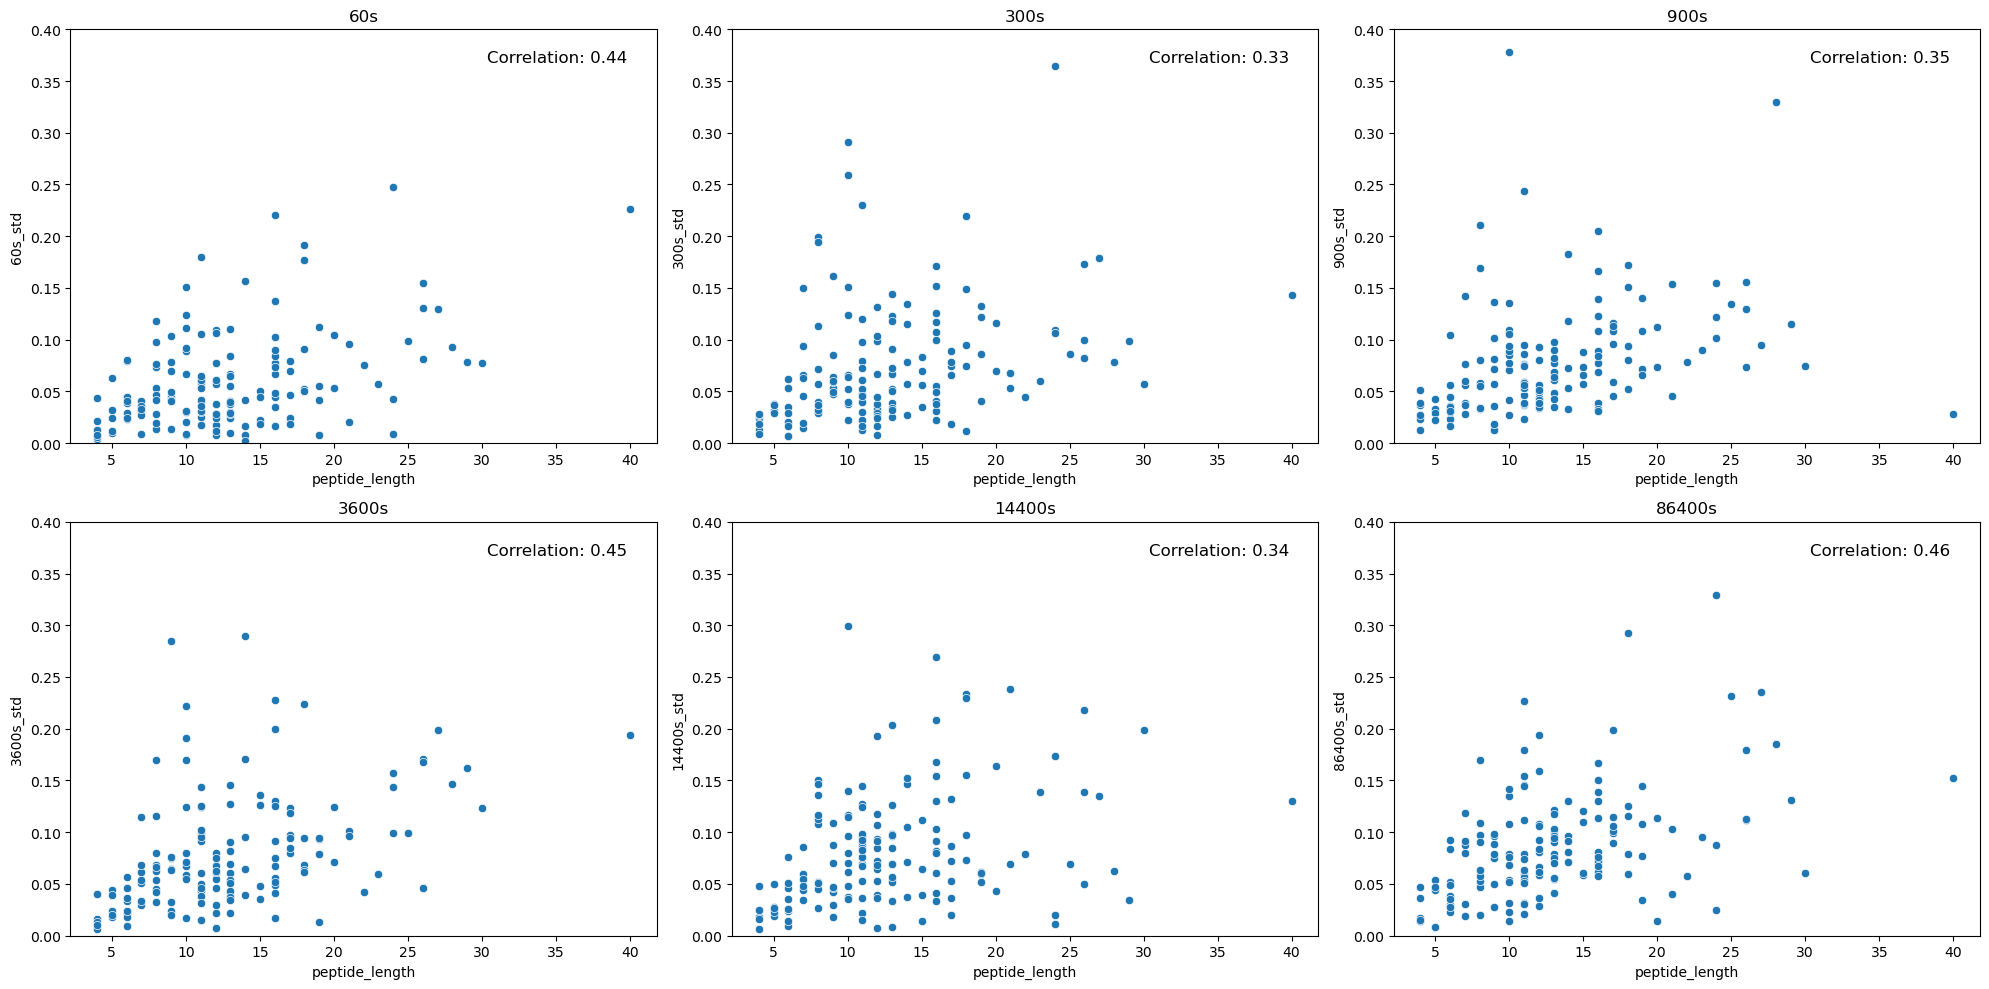

In [40]:
#make scatterplots for each time point as subplots in one figure. also plot 
# Define the time points and corresponding columns
time_points = ['60s', '300s', '900s', '3600s', '14400s', '86400s']
columns = ['60s_std', '300s_std', '900s_std', '3600s_std', '14400s_std', '86400s_std']

# Create subplots
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
ax = ax.flatten()

for i, (time_point, column) in enumerate(zip(time_points, columns)):
    sns.scatterplot(x='peptide_length', y=column, data=nist, ax=ax[i])
    ax[i].set_title(time_point)
    
    # Calculate the correlation coefficient
    correlation = np.corrcoef(nist['peptide_length'], nist[column])[0, 1]
    
    # Add the correlation coefficient to the top right of the plot
    ax[i].text(0.95, 0.95, f'Correlation: {correlation:.2f}', 
               transform=ax[i].transAxes, 
               fontsize=12, 
               verticalalignment='top', 
               horizontalalignment='right')
    #set y axis to be 0.4
    ax[i].set_ylim(0, 0.4)
plt.tight_layout()
plt.savefig('nist_noise.png', dpi = 600)

<Axes: xlabel='peptide_length', ylabel='60s_std_norm'>

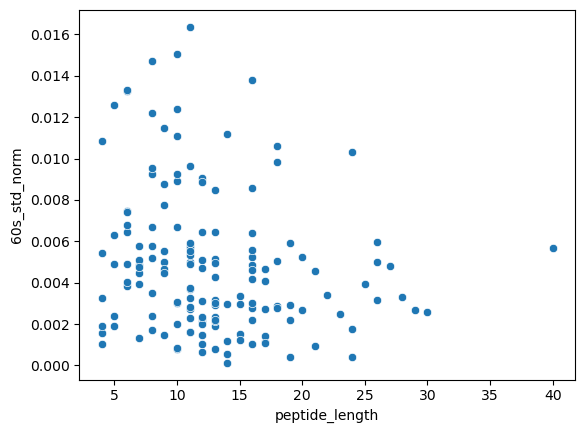

In [29]:
sns.scatterplot(x = 'peptide_length', y = '60s_std_norm', data = nist)



In [30]:
#plot the normalized standard deviation for each peptide length


In [31]:
nist = pd.read_csv('/Users/yuliagutierrez/Downloads/nist_fab_lab1a.csv')
nist['0s'] =(nist['0s_L1A'] - nist['0s_L1A'])*nist['charge(z)']
nist['30s'] =(nist['30s_L1Ar1'] - nist['0s_L1A'])*nist['charge(z)']
nist['60s'] =(nist['60s_L1A'] - nist['0s_L1A'])*nist['charge(z)']
nist['300s'] =(nist['300s_L1A'] - nist['0s_L1A'])*nist['charge(z)']
nist['900s'] =(nist['900s_L1A'] - nist['0s_L1A'])*nist['charge(z)']
nist['3600s'] =(nist['3600s_L1A'] - nist['0s_L1A'])*nist['charge(z)']
nist['14400s'] =(nist['14400s_L1A'] - nist['0s_L1A'])*nist['charge(z)']
nist['86400s'] = (nist['full'] - nist['0s_L1A'])*nist['charge(z)']
#drop columns 0s_L1A, 30s_L1Ar1, 60s_L1A, 300s_L1A, 900s_L1A, 3600s_L1A, 14400s_L1A, full
nist = nist.drop(columns=['0s_L1A', '30s_L1Ar1', '60s_L1A', '300s_L1A', '900s_L1A', '3600s_L1A', '14400s_L1A', 'full'])
nist

,Chain,Peptide,charge(z),0s,30s,60s,300s,900s,3600s,14400s,86400s
0,HC,QVTLRESGPA,2,0.0,4.356867,4.331400,4.233200,4.262000,4.286333,4.480133,5.834267
1,HC,RESGPALVKPTQT,2,0.0,2.259933,2.642000,3.375333,3.587667,4.074067,4.523000,6.685200
2,HC,RESGPALVKPTQTLTL,3,0.0,2.715300,3.135800,3.871500,4.107100,4.498900,4.954500,7.675800
3,HC,TCTFSG,1,0.0,0.718800,0.854333,1.030767,1.146433,1.232967,1.481833,2.593867
4,HC,TCTFSGF,1,0.0,0.743033,0.806367,1.196700,1.483833,1.769167,2.052400,2.951133
...,...,...,...,...,...,...,...,...,...,...,...
149,LC,YSLSST,1,0.0,0.066333,0.091733,0.106400,0.177067,0.454133,0.752967,2.287567
150,LC,YSLSSTL,1,0.0,0.118333,0.175367,0.230767,0.291267,0.512600,0.784200,2.188167
151,LC,LTLSKADYEKHKVYACE,4,0.0,1.560533,1.825200,2.068533,2.202267,2.680400,3.434667,7.721333
152,LC,TLSKADYEKHKVYACE,4,0.0,1.525733,1.789867,2.015600,2.151467,2.626267,3.341733,7.210800


In [32]:
hdxer_path = '/Users/yuliagutierrez/Desktop/F24/sali_lab/rotation_project/hdxer_fab_logpf.dat'
hdxer_fab = pd.read_csv(hdxer_path, delim_whitespace=True)
hdxer_fab
hdxer_fab.rename(columns={'#': 'res_num', 'ResID': 'hxder_log_pf'}, inplace=True)
hdxer_fab

#drop all columns except for the res_num and hxder_pf
hdxer_fab = hdxer_fab[['res_num', 'hxder_log_pf']]
hdxer_fab
#turn this into a dictionary where res_num is the key and hxder_pf is the value
hdxer_dict = dict(zip(hdxer_fab['res_num'], hdxer_fab['hxder_log_pf']))
#if hdxer dict deosn't have all key between 1-440, add missig ones with a value of 0
for i in range(1, 441):
    if i not in hdxer_dict:
        hdxer_dict[i] = 0


/var/folders/n0/ny5865_5769bgkky50n4qpg40000gp/T/ipykernel_42643/3217666156.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  hdxer_fab = pd.read_csv(hdxer_path, delim_whitespace=True)


In [33]:
peptide_list = nist['Peptide'].tolist()

# Create a dictionary to store the results for each time point
all_results = {}

# Time points
time_points = [0, 30, 60, 300, 900, 3600, 14400, 86400]

for timepoint in time_points:
    # Create an empty dictionary for each time point
    imp_results = {}
    for peptide in peptide_list: 
        try:
            # Calculate the percentage of deuterium per peptide for the given time point
            result = fm.calc_percentage_deuterium_per_peptide(peptide, 0.85, timepoint, 7, 298, '/Users/yuliagutierrez/Downloads/fab_h.pdb')
            imp_results[peptide] = result
        except ValueError as e:
            print(f"Error processing peptide {peptide} at timepoint {timepoint}: {e}")
            imp_results[peptide] = None
    # Store the results for the current time point in the all_results dictionary
    all_results[timepoint] = imp_results

Error processing peptide TCTFSG at timepoint 0: Peptide sequence not found in the full sequence.
Error processing peptide TCTFSGF at timepoint 0: Peptide sequence not found in the full sequence.
Error processing peptide SVGWIRQPPGKALEWLAD at timepoint 0: Peptide sequence not found in the full sequence.
Error processing peptide LEWLAD at timepoint 0: Peptide sequence not found in the full sequence.
Error processing peptide EWLAD at timepoint 0: Peptide sequence not found in the full sequence.
Error processing peptide WLAD at timepoint 0: Peptide sequence not found in the full sequence.
Error processing peptide WLADI at timepoint 0: Peptide sequence not found in the full sequence.
Error processing peptide ADIWWDDKKHYNPSLKDRL at timepoint 0: Peptide sequence not found in the full sequence.
Error processing peptide WWDDKKHYNPSLKDRL at timepoint 0: Peptide sequence not found in the full sequence.
Error processing peptide YYCARD at timepoint 0: Peptide sequence not found in the full sequence

In [34]:
peptide_list = nist['Peptide'].tolist()

# Create a dictionary to store the results for each time point
all_results_hdxer = {}

# Time points
time_points = [0, 30, 60, 300, 900, 3600, 14400, 86400]

for timepoint in time_points:
    # Create an empty dictionary for each time point
    hdxer_results = {}
    for peptide in peptide_list: 
        try:
            # Calculate the percentage of deuterium per peptide for the given time point
            result = fm.calc_percentage_deuterium_per_peptide_hdxer(peptide, hdxer_dict, 0.85, timepoint, 7, 298, '/Users/yuliagutierrez/Downloads/fab_h.pdb')
            hdxer_results[peptide] = result
        except ValueError as e:
            print(f"Error processing peptide {peptide} at timepoint {timepoint}: {e}")
            hdxer_results[peptide] = None
    # Store the results for the current time point in the all_results dictionary
    all_results_hdxer[timepoint] = hdxer_results

Error processing peptide TCTFSG at timepoint 0: Peptide sequence not found in the full sequence.
Error processing peptide TCTFSGF at timepoint 0: Peptide sequence not found in the full sequence.
Error processing peptide SVGWIRQPPGKALEWLAD at timepoint 0: Peptide sequence not found in the full sequence.
Error processing peptide LEWLAD at timepoint 0: Peptide sequence not found in the full sequence.
Error processing peptide EWLAD at timepoint 0: Peptide sequence not found in the full sequence.
Error processing peptide WLAD at timepoint 0: Peptide sequence not found in the full sequence.
Error processing peptide WLADI at timepoint 0: Peptide sequence not found in the full sequence.
Error processing peptide ADIWWDDKKHYNPSLKDRL at timepoint 0: Peptide sequence not found in the full sequence.
Error processing peptide WWDDKKHYNPSLKDRL at timepoint 0: Peptide sequence not found in the full sequence.
Error processing peptide YYCARD at timepoint 0: Peptide sequence not found in the full sequence

In [19]:
#turn dictionary into a dataframe
df = pd.DataFrame(all_results)
# df.to_csv('/Users/yuliagutierrez/Downloads/forward_model_results.csv')
#rename columns to match nist data
df.columns = ['0s_IMP', '30s_IMP', '60s_IMP', '300s_IMP', '900s_IMP', '3600s_IMP', '14400s_IMP', '86400s_IMP']
df.reset_index(inplace=True)
df.rename(columns = {'index':'Peptide'}, inplace = True)

ValueError: Length mismatch: Expected axis has 0 elements, new values have 8 elements

In [20]:
hdxer_df = pd.DataFrame(all_results_hdxer)
# hdxer_df.to_csv('/Users/yuliagutierrez/Downloads/forward_model_results_hdxer.csv')
#rename columns to match nist data
hdxer_df.columns = ['0s_HDXER', '30s_HDXER', '60s_HDXER', '300s_HDXER', '900s_HDXER', '3600s_HDXER', '14400s_HDXER', '86400s_HDXER']
hdxer_df.reset_index(inplace=True)
hdxer_df.rename(columns = {'index':'Peptide'}, inplace = True)
hdxer_df

,Peptide,0s_HDXER,30s_HDXER,60s_HDXER,300s_HDXER,900s_HDXER,3600s_HDXER,14400s_HDXER,86400s_HDXER
0,QVTLRESGPA,0.0,0.230974,0.415030,1.095945,1.674597,3.054277,4.387767,5.754705
1,RESGPALVKPTQT,0.0,0.743076,1.147927,2.065043,2.733286,3.974114,5.539455,6.895460
2,RESGPALVKPTQTLTL,0.0,0.955202,1.545617,3.314919,4.398330,5.663807,7.223013,8.643056
3,TCTFSG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TCTFSGF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
149,YSLSST,0.0,0.000459,0.000918,0.004584,0.013702,0.053908,0.202100,0.831758
150,YSLSSTL,0.0,0.000554,0.001108,0.005531,0.016540,0.065201,0.246357,1.064273
151,LTLSKADYEKHKVYACE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152,TLSKADYEKHKVYACE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
#merge nist and imp dataframes
merged = pd.merge(nist, df, on='Peptide')
# merged.to_csv('/Users/yuliagutierrez/Downloads/merged_data.csv')
merged

KeyError: 'Peptide'

In [22]:
all_merged = pd.merge(merged, hdxer_df, on='Peptide')
#drop the peptide MTQSPSTL from all_merged
all_merged = all_merged[all_merged.Peptide != 'MTQSPSTL']


NameError: name 'merged' is not defined

In [23]:
# all_merged.to_csv('/Users/yuliagutierrez/Downloads/all_merged.csv')
all_merged.dropna(inplace=True)
all_merged

NameError: name 'all_merged' is not defined

In [24]:
all_merged[all_merged['30s_HDXER'] < 0]

NameError: name 'all_merged' is not defined

In [22]:
#find entries where 0s_IMP is not not 0 
merged[merged['30s'] < -10]


,Chain,Peptide,charge(z),0s,30s,60s,300s,900s,3600s,14400s,86400s,0s_IMP,30s_IMP,60s_IMP,300s_IMP,900s_IMP,3600s_IMP,14400s_IMP,86400s_IMP
102,LC,MTQSPSTL,2,0.0,-573.9456,-285.038333,-284.539267,-284.438,-573.0818,-572.924533,295.8036,0.0,0.520926,0.906309,2.038149,2.471565,2.693874,2.997633,3.414559


/opt/anaconda3/envs/imp/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


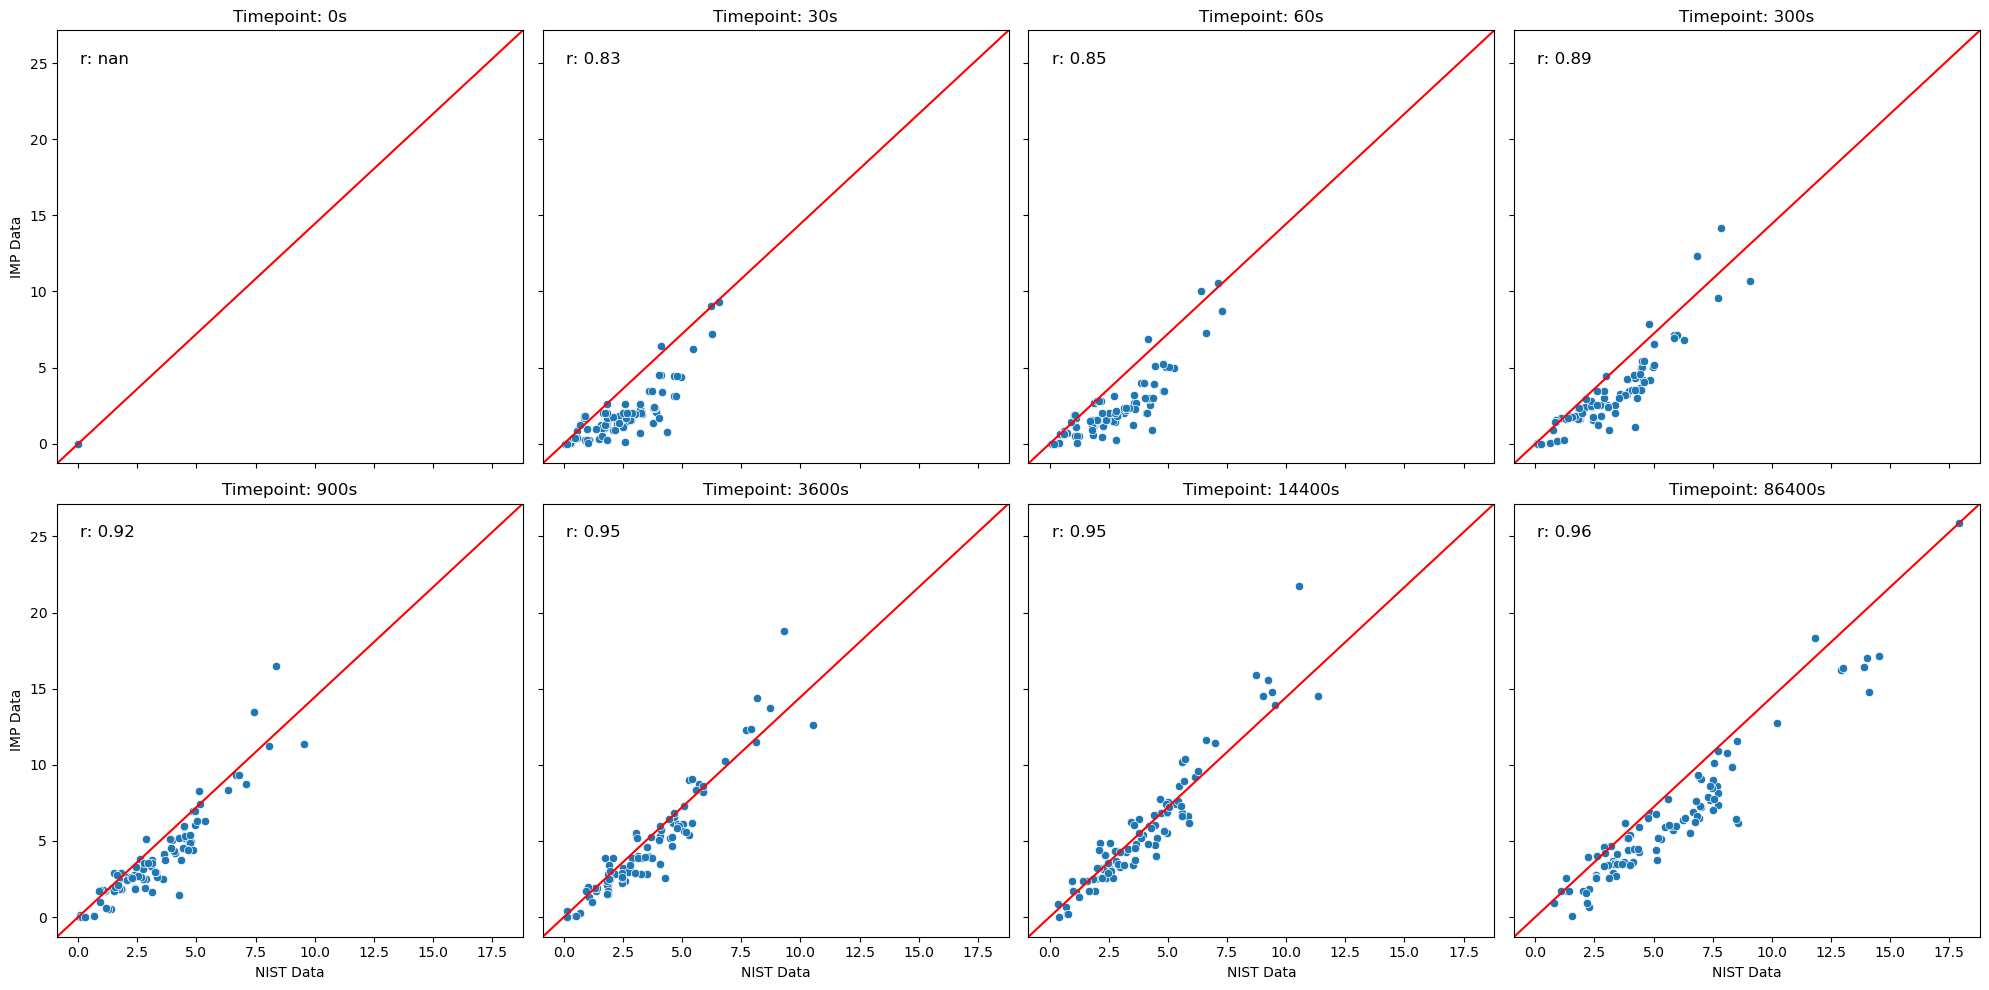

In [29]:
# Create scatter plots for each time point using subplots
import matplotlib.pyplot as plt
import seaborn as sns

# Create scatter plots for each time point using subplots with shared axes
fig, axes = plt.subplots(2, 4, figsize=(20, 10), sharex=True, sharey=True)
axes = axes.flatten()

for i, timepoint in enumerate(time_points):
    ax = axes[i]
    # Create scatter plot
    sns.scatterplot(data=all_merged, x=f'{timepoint}s', y=f'{timepoint}s_IMP', ax=ax)
    
    # Calculate correlation coefficient
    correlation = all_merged[f'{timepoint}s'].corr(all_merged[f'{timepoint}s_IMP'])
    
    # Add correlation text on the plot
    ax.text(0.05, 0.95, f'r: {correlation:.2f}', transform=ax.transAxes, fontsize=12, verticalalignment='top')
    ax.plot([0, 25], [0, 25], transform=ax.transAxes, ls="-", c="red")
    
    # Set axes labels
    ax.set_xlabel("NIST Data")
    ax.set_ylabel("IMP Data")
    ax.set_title(f"Timepoint: {timepoint}s")

plt.tight_layout()
plt.savefig('/Users/yuliagutierrez/Downloads/imp_vs_nist.png', dpi = 600)

NameError: name 'all_merged' is not defined

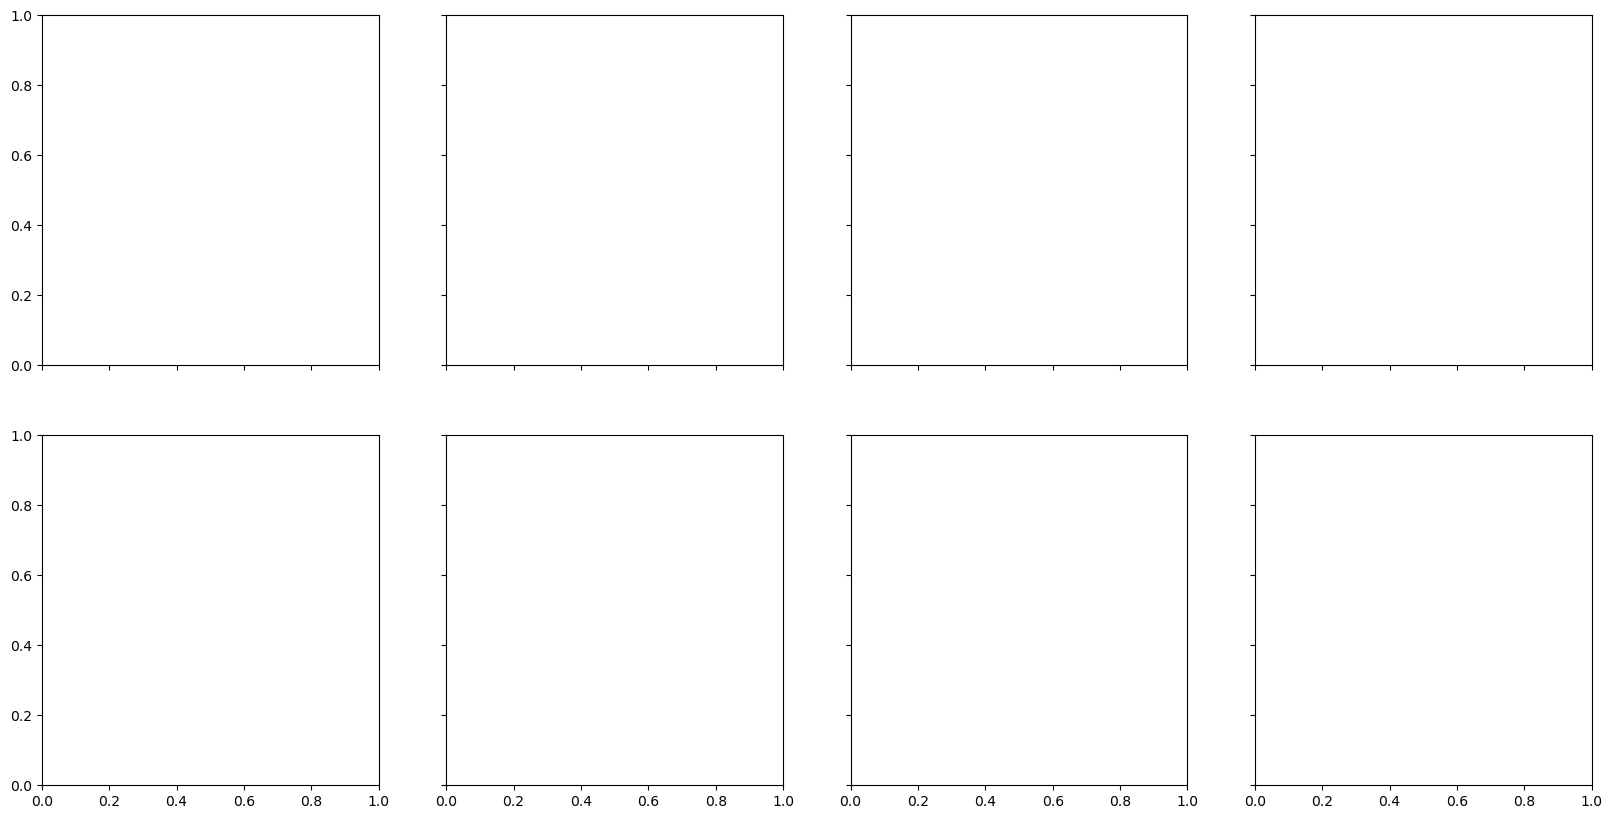

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create scatter plots for each time point using subplots with shared axes
fig, axes = plt.subplots(2, 4, figsize=(20, 10), sharex=True, sharey=True)
axes = axes.flatten()

for i, timepoint in enumerate(time_points):
    ax = axes[i]
    # Create scatter plot
    sns.scatterplot(data=all_merged, x=f'{timepoint}s', y=f'{timepoint}s_HDXER', ax=ax)
    
    # Calculate correlation coefficient
    correlation = all_merged[f'{timepoint}s'].corr(all_merged[f'{timepoint}s_HDXER'])
    
    # Add correlation text on the plot
    ax.text(0.05, 0.95, f'r: {correlation:.2f}', transform=ax.transAxes, fontsize=12, verticalalignment='top')
    ax.plot([0, 25], [0, 25], transform=ax.transAxes, ls="-", c="red")
    
    # Set axes labels
    ax.set_xlabel("NIST Data")
    ax.set_ylabel("HDXER Data")
    ax.set_title(f"Timepoint: {timepoint}s")

plt.tight_layout()
plt.savefig('/Users/yuliagutierrez/Downloads/hdxer_vs_nist.png', dpi = 600)

In [36]:
#import not averaged nist data 
raw_nist = pd.read_excel('/Users/yuliagutierrez/Desktop/nist_lab1_full.xlsx')

In [37]:
raw_nist

,Chain,Peptide,Charge,rt_start,rt_end,0s_L1Ar1,0s_L1Ar2,0s_L1Ar3,30s_L1Ar1,30s_L1Ar2,...,900s_L1Ar3,3600s_L1Ar1,3600s_L1Ar2,3600s_L1Ar3,14400s_L1Ar1,14400s_L1Ar2,14400s_L1Ar3,86400s_L1Ar1,86400s_L1Ar2,86400s_L1Ar3
0,HC,QVTLRESGPA,2,5.321253,5.487919,529.501738,529.576711,529.443457,531.728267,531.721355,...,531.700042,531.568583,531.689017,531.693753,531.773460,531.749745,531.718946,532.404644,532.434776,532.433852
1,HC,RESGPALVKPTQT,2,4.384112,4.550778,692.781992,692.771184,692.769391,693.897789,693.949503,...,694.598650,694.821671,694.776552,694.835367,695.098974,694.995943,695.012154,696.080190,696.144364,696.125766
2,HC,RESGPALVKPTQTLTL,3,6.343849,6.510515,571.344682,571.335651,571.335674,572.242664,572.271622,...,572.737709,572.840048,572.812830,572.862242,573.027783,572.971997,572.970769,573.880226,573.910226,573.901450
3,HC,TCTFSG,1,5.360043,5.526709,615.624537,615.620967,615.624882,616.363936,616.374819,...,616.759107,616.862989,616.843116,616.863200,617.098234,617.100660,617.117049,618.194873,618.205779,618.251303
4,HC,TCTFSGF,1,7.678484,7.845150,762.797432,762.739962,762.745395,763.501068,763.520096,...,764.216662,764.532591,764.529017,764.528742,764.883627,764.793309,764.763117,765.647960,765.749527,765.738708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,LC,YSLSST,1,5.320965,5.487631,657.665574,657.622268,657.638223,657.732951,657.689084,...,657.826877,658.093417,658.095770,658.099344,658.430573,658.378004,658.376416,659.902338,659.914128,659.972351
150,LC,YSLSSTL,1,6.914288,7.080954,770.924052,770.868666,770.932732,770.932116,771.058974,...,771.244242,771.432755,771.451502,771.378987,771.706128,771.701443,771.670641,773.089981,773.067365,773.132580
151,LC,LTLSKADYEKHKVYACE,4,4.997309,5.163975,500.591200,500.583863,500.566962,500.976872,500.984286,...,501.149738,501.245951,501.242299,501.264106,501.454410,501.432089,501.431578,502.502645,502.502834,502.527686
152,LC,TLSKADYEKHKVYACE,4,4.500370,4.667036,472.290761,472.282312,472.282179,472.668968,472.678833,...,472.843096,472.942640,472.940554,472.941849,473.136352,473.107547,473.117661,474.076239,474.081869,474.105262
